<a href="https://colab.research.google.com/github/blacktruth513/CodeStates_Project/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ruiqurm/lianjia
#!ls
!unzip lianjia.zip 

Saving kaggle.json to kaggle (19).json
lianjia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  lianjia.zip
replace new.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
# %%capture
# import sys

# if 'google.colab' in sys.modules:
#     # Install packages in Colab
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pandas-profiling==2.*
#     !pip install pdpbox
#     !pip install shap

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./new.csv', encoding = 'GB2312',low_memory=False)  #GB/T 2312-1980 is a key official character set of the People's Republic of China, used for Simplified Chinese characters.
df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [4]:
df.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [5]:
#실험용 데이터 카피 
df_copy = df.copy()
df_copy

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


# 데이터 설명

- 链家网是集房源信息搜索、产品研发、大数据处理、服务标准建立为一体的以数据驱动的全价值链房产服务平台。主营：二手房、租房、新房。您可通过小区找房，链家App等找房。 <br> 
:  "리엔지아"는 한국의 다방, 직방과 같은 중국의 대표적인 판매·임대·분양용 주택 공급 플랫폼으로 주요 영업(판매) 상품은 중고 주택, 새 주택, 렌트 등이 있다.

- Contents : Housing price of Beijing from 2011 to 2017, fetching from Lianjia.com
- Inspiration : 
It may help you predict the housing price of Beijing.

#변수 설명

- url: the url which fetches the data
-id: the id of transaction
-Lng: and Lat coordinates, using the BD09 protocol.
-Cid: community id
-tradeTime: the time of transaction
-DOM: active days on market.Know more in https://en.wikipedia.org/wiki/ / Days_on_market / 부동산이 매물로 시장에 나와 있는 기간
-followers: the number of people follow the transaction. / 거래 참여자 수
-totalPrice: the total price
-price: the average price by square
-square: the square of house
-livingRoom: the number of living room
-drawingRoom: the number of drawing room
-kitchen: the number of kitchen
-bathroom the number of bathroom
-floor: the height of the house. I will turn the Chinese characters to English in the next version.
-buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ). / 범주형 
-constructionTime: the time of construction
-renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 ) / 범주형
-buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ). / 범주형
-ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
-elevator have ( 1 ) or not have elevator( 0 ) / 범주형
-fiveYearsProperty: It's related to China restricted purchase of houses policy / 범주형
-  Community average price / 지역 주택 평단가 가격

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [7]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [9]:
# 데이터 결측값 확인
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

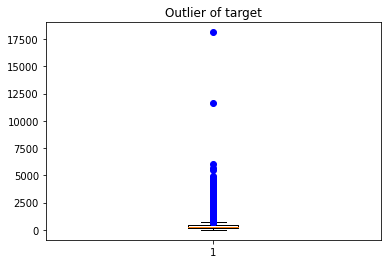

In [10]:
#이상값 확인
plt.title('Outlier of target')
plt.boxplot(df['totalPrice'], sym='bo')
plt.show()

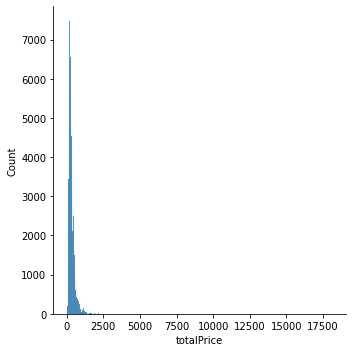

In [11]:
# 타겟변수 분포도 확인 시각화
sns.displot(df['totalPrice']); #타겟 변수 / 분포가 왼쪽으로 편중되어 있다. 

In [7]:
df.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [4]:
import datetime as dt

In [5]:
################################################# 데이터 전처리 ####################################################### 

# 1) 변수에 포함되어 있는 한자 등 특수 문자 제거 ex) (高 ，中， 底 : 주택의 높이를 나타내는 한자)
df['floor'] = df['floor'].replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '') # 정규식 활용

# 2) 알 수 없는 관측치 제거  
#df['constructionTime'].value_counts() # 약 19,000개의 건축 연도를 알 수 없는 데이터 값이 있다. 데이터 수를 고려했을 때, 이 값들을 제거해도 된다고 판단 
df = df[~df['constructionTime'].isin(['未知'])]

# 3) 컬럼에 포함되어 있는 결측값을 적절한 값 대체(DOM 컬럼에 대하여)
# Days_on_market(DOM)란, 부동산이 매물로 시장에 나와 있는 기간(단위 / 일)로서, 본 데이터에 포함되어 있는 해당 컬럼의 결측치가 약 15만개(데이터 절반)에 달해 이 값을 중위값으로 대체하여 연구에 사용할 수 있도록 했다.
df['DOM'].fillna(df['DOM'].median(),inplace=True) 

# 4) 결측치 제거 / 나머지 컬럼의 결측값이 비교적 적으므로 영향이 적다고 판단하여 결측치를 제거
df = df.dropna(axis=0, how='any')

# 4-1) 날짜 컬럼 정리 (연도만 사용)
def tradeTimeMod(x):
    return x[0:4]

df['tradeTime'] = df['tradeTime'].apply(tradeTimeMod)

# 5) object형 자료형을 가진 컬럼에 대해 int형으로 형변환
#df['tradeTime'] = df['tradeTime'].astype('int64')
df['livingRoom'] = df['livingRoom'].astype('int64')
df['drawingRoom']= df['drawingRoom'].astype('int64')
df['bathRoom']= df['bathRoom'].astype('int64')
df['floor']= df['floor'].astype('int64')

# 6) int형 자료형을 가진 컬럼에 대해 범주형으로 형변환
df['buildingType']= df['buildingType'].astype(object) 
df['renovationCondition']= df['renovationCondition'].astype(object) 
df['buildingStructure ']= df['buildingStructure'].astype(object)
df['elevator']= df['elevator'].astype(object)
df['fiveYearsProperty']= df['fiveYearsProperty'].astype(object)
df['subway']= df['subway'].astype(object)
df['district']= df['district'].astype(object)

# 7) 거래날짜 별 데이터 순차 정렬
df = df.sort_values(by=['tradeTime'] ,ascending=True).reset_index()
df.drop('index', axis=1, inplace=True)

# 8) 분석에 영향력이 없다고 생각하는 변수 제거
df.drop(['url', 'id', 'Lng', 'Lat', 'Cid', 'price'], axis=1, inplace=True)

# 9) 화폐 단위 통일 (단위 가격 : 1만 위안, 예: totalPrice가 152.5면 1만배를 한 1,520,000 위안이 총 가격이다.)
df['communityAverage'] = (df['communityAverage'] * 0.0001)

# 10) 이상값 제거 
#타겟 변수 이상값 제거
df['totalPrice'] = df[df['totalPrice'] < np.percentile(df['totalPrice'], 99)]['totalPrice']
# # 특성 변수 이상값 제거(0.05% 극단값)
# df['price'] = df[df['price'] < np.percentile(df['price'], 99.5)]['price']
# df['square'] = df[df['square'] < np.percentile(df['square'], 99.5)]['square']
# df['communityAverage'] = df[df['communityAverage'] < np.percentile(df['communityAverage'], 99.5)]['communityAverage']

# 거래날짜와 건축연도가 불일치하는 행 제거 
df = df.drop(df.index[0:4])

df = df.dropna(axis=0, how='any').reset_index()
df.drop('index', axis=1, inplace=True)

In [6]:
df

,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,buildingStructure
0,2009,7.0,0,150.0,55.63,2,1,1,1,6,4,1992,1,2,0.250,0,1,0,10,7.7781,2
1,2010,1.0,0,97.0,62.63,2,1,0,1,14,3,2006,3,6,0.125,1,0,0,12,3.9492,6
2,2010,1.0,0,79.0,45.32,1,1,0,1,14,3,2006,4,6,0.125,1,0,0,12,3.9492,6
3,2010,1.0,0,83.6,64.02,2,1,0,1,6,4,1990,3,2,0.333,0,0,0,12,3.9381,2
4,2010,1.0,0,153.0,91.39,2,1,0,1,6,4,2003,4,2,0.500,0,0,0,12,3.6923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294711,2018,86.0,97,510.0,108.72,2,1,1,1,25,1,2004,4,6,0.300,1,1,1,7,4.6667,6
294712,2018,240.0,54,518.0,118.58,3,1,1,1,6,4,2006,3,2,0.500,0,1,1,6,4.3641,2
294713,2018,23.0,49,415.5,40.50,1,1,1,1,20,1,1992,3,2,0.200,1,1,1,10,9.8860,2
294714,2018,45.0,159,282.0,81.83,2,1,1,1,6,4,2003,4,2,0.500,0,1,0,6,3.6090,2


In [7]:
df.describe()

,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingStructure,ladderRatio,communityAverage
count,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,294716.000000,2.947160e+05,294716.000000
mean,18.124425,17.094379,337.182582,81.584792,1.997774,1.164684,0.994266,1.171847,13.130672,4.408397,6.830502e+01,6.335387
std,37.003149,34.695139,186.491288,33.559485,0.752550,0.508203,0.101167,0.404900,7.752314,1.910217,2.607477e+04,2.190601
min,1.000000,0.000000,0.100000,7.370000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.400000e-02,1.084700
25%,6.000000,0.000000,205.000000,57.840000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,2.500000e-01,4.633900
50%,7.000000,5.000000,293.000000,73.580000,2.000000,1.000000,1.000000,1.000000,11.000000,6.000000,3.330000e-01,5.896000
75%,8.000000,19.000000,420.000000,97.470000,2.000000,1.000000,1.000000,1.000000,19.000000,6.000000,5.000000e-01,7.553900
max,1677.000000,1143.000000,1199.000000,497.650000,8.000000,5.000000,3.000000,7.000000,42.000000,6.000000,1.000940e+07,18.310900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294716 entries, 0 to 294715
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tradeTime            294716 non-null  object 
 1   DOM                  294716 non-null  float64
 2   followers            294716 non-null  int64  
 3   totalPrice           294716 non-null  float64
 4   square               294716 non-null  float64
 5   livingRoom           294716 non-null  int64  
 6   drawingRoom          294716 non-null  int64  
 7   kitchen              294716 non-null  int64  
 8   bathRoom             294716 non-null  int64  
 9   floor                294716 non-null  int64  
 10  buildingType         294716 non-null  object 
 11  constructionTime     294716 non-null  object 
 12  renovationCondition  294716 non-null  object 
 13  buildingStructure    294716 non-null  int64  
 14  ladderRatio          294716 non-null  float64
 15  elevator         

In [9]:
#완료된 정제 데이터 
df.isnull().sum()

tradeTime              0
DOM                    0
followers              0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
buildingStructure      0
dtype: int64

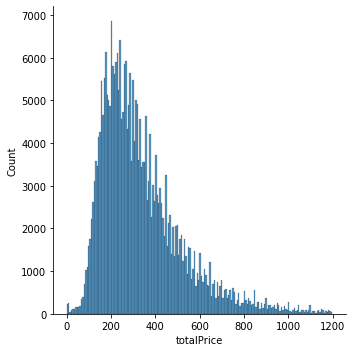

In [10]:
# 주요변수 분포도 확인 시각화
sns.displot(df['totalPrice']); #타겟 변수

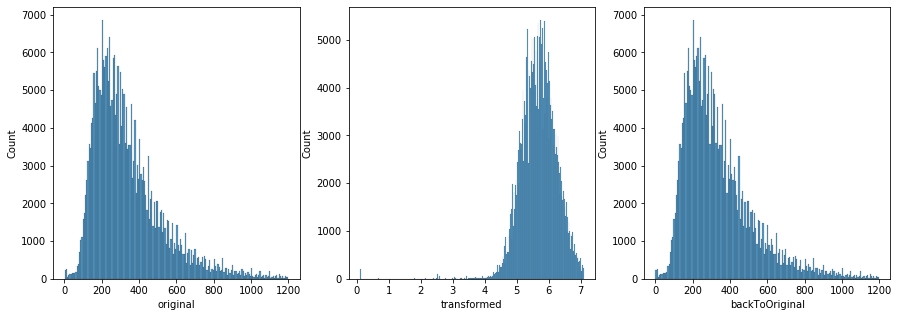

In [11]:
#로그변환을 통한 타겟변수 정규분포화
plots=pd.DataFrame()
plots['original']=df['totalPrice']
plots['transformed']=np.log1p(df['totalPrice'])
plots['backToOriginal']=np.expm1(np.log1p(df['totalPrice']))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);

- 분포를 로그변환했을 때 정규분포형에 가까워진 것을 알 수 있다. 

In [7]:
# 특성 간 상관 관계 분석 (수치형 변수) 
corr_df1 = df.corr(method='pearson') 
corr_df1 = corr_df1.loc['totalPrice']
corr_df1 = corr_df1.drop(['totalPrice']) #동일 변수 상관계수 drop

In [8]:
corr_top = pd.DataFrame(corr_df1.sort_values(ascending=False)) #시리즈 > DF化
corr_top

,totalPrice
square,0.491519
communityAverage,0.430065
livingRoom,0.405538
bathRoom,0.361747
drawingRoom,0.296863
DOM,0.258645
buildingStructure,0.194889
followers,0.182406
floor,0.175015
kitchen,0.071186


- 상관관계 분석 결과 : price - square - communityAverage 순으로 높은 상관관계를 보이고 있으며 상관관계가 상대적으로 낮은 변수들에 대해 분석에 사용 여부를 정할 필요성이 있다고 판단했다. / 분석 요소 : target 변수인 totalprice에 대해 price 변수는 totalprice를 square 값으로 나눠 만든 변수이므로 상관관계와 인과관계에 대해 생각해봐야한다. 

In [14]:
# 타겟변수 - 주요 특성 간 산점도 시각화 (상관관계 분석 결과를 바탕으로)
df_sample1 = df[['totalPrice', 'square', 'communityAverage', 'bathRoom', 'livingRoom',  'drawingRoom']]

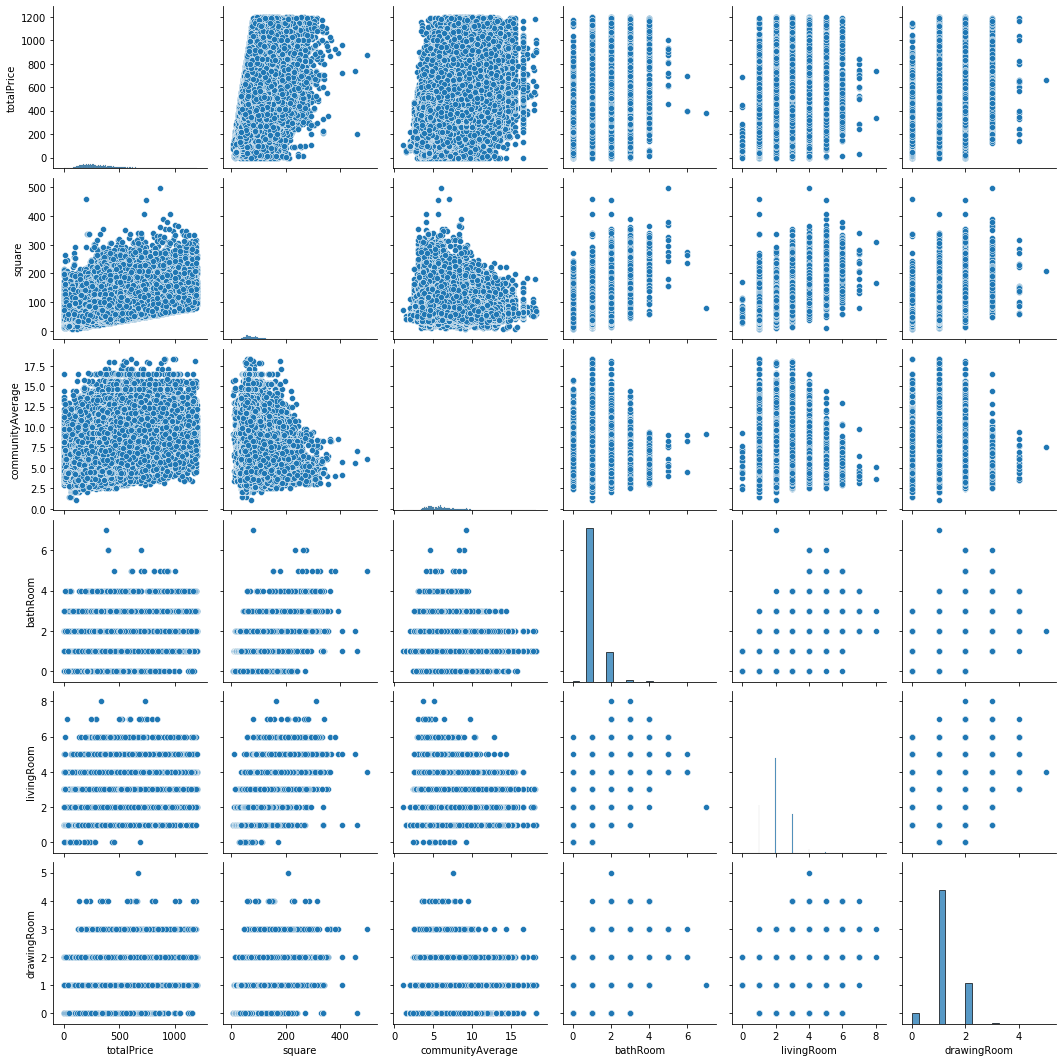

In [15]:
sns.pairplot(df_sample1)
plt.show()

In [16]:
#!pip3 install statsmodels

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [17]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_sample1.values, i) for i in range(df_sample1.shape[1])]
vif["features"] = df_sample1.columns
vif

,VIF Factor,features
0,8.008089,totalPrice
1,29.090980,square
2,7.552360,communityAverage
3,18.126718,bathRoom
4,16.120794,livingRoom
5,10.131568,drawingRoom


- 다중공선성(VIF) 확인 결과 주요 변수에서 기준값인 10을 초과하는 수치를 보여 정규화 등의 조치를 시행할 필요성이 보인다 . cf) 다중공선성(Multicollinearity) : 독립 변수간 상관 관계를 보이는 것. price 변수를 제거했을 때 vif 값이 낮아졌다.

In [18]:
# 타겟 변수 정의
target = 'totalPrice'

In [26]:
#!pip install fast_ml

     |████████████████████████████████| 51kB 2.5MB/s 


In [19]:
from fast_ml.model_development import train_valid_test_split

In [20]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'totalPrice', 
                                                                            method='sorted', sort_by_col='tradeTime',
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

In [19]:
# #데이터셋 분할 / 6:2:2
# train = df[0:176830]
# valid = df[176830:235833]
# test = df[235833:294716]

In [21]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(176829, 20) (176829,) (58943, 20) (58943,) (58944, 20) (58944,)


In [22]:
X_train

,tradeTime,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,buildingStructure
0,2009,7.0,0,55.63,2,1,1,1,6,4,1992,1,2,0.250,0,1,0,10,7.7781,2
114,2010,1.0,0,65.84,2,1,0,1,6,4,2003,3,2,0.500,0,0,0,12,3.7588,2
115,2010,1.0,0,167.80,4,2,0,2,6,4,2003,4,2,0.500,0,0,0,12,3.9294,2
116,2010,1.0,0,91.05,1,2,0,1,15,4,2003,4,6,0.333,1,0,0,12,3.7588,6
117,2010,1.0,0,109.35,2,2,0,1,13,4,2005,4,6,0.667,1,0,0,12,3.9294,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232526,2016,5.0,6,90.36,2,1,1,1,6,4,2008,1,2,0.333,0,0,0,8,7.5792,2
232536,2016,74.0,27,188.00,4,2,1,3,18,1,2013,4,6,1.000,1,0,1,7,6.9200,6
232537,2016,25.0,34,61.70,2,1,1,1,6,4,1989,4,2,0.071,0,1,1,8,7.8261,2
232538,2016,28.0,56,62.84,3,0,1,1,6,4,1980,4,2,0.333,0,0,1,1,6.6495,2


In [17]:
# baseline model
base_pred = df.totalPrice.mean()
base_pred = [df.totalPrice.mean() for i in range(len(y_train))]
print('baseline MAE : {}'.format(mean_absolute_error(y_train, base_pred)))
print('baseline RMSE : {}'.format(sqrt(mean_squared_error(y_train, base_pred))))
print('baseline $R^2$ score : {}'.format(r2_score(y_train, base_pred)))

baseline MAE : 131.18309865854843
baseline RMSE : 161.451196559387
baseline $R^2$ score : -0.15295781496487493


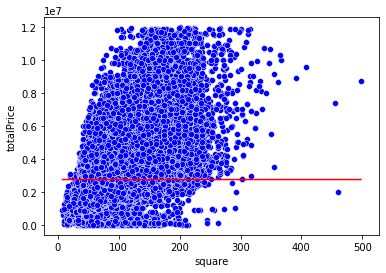

In [26]:
# 상관 변수가 높은 특성과 타겟의 기준모델
x_base = train['square']
y_base = train['totalPrice']

sns.lineplot(x=x_base, y=base_predict, color='red')
sns.scatterplot(x=x_base, y=y_base, color='blue');

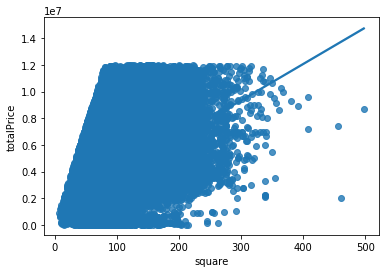

In [27]:
# Seaborn regplot(회귀선 그래프 시각화) 최소제곱법을 이용한 선형 회귀계수
sns.regplot(x=df['square'], y=df['totalPrice']);

- 선형회귀선에 예측치가 좀 더 밀집한 형태로 변환됐음을 알 수 있다. 

In [16]:
#모델링 / 다양한 모델에 데이터를 적용시킴으로서, 결괏값 차이 분석 실시

In [23]:
from math import sqrt
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor

In [18]:
# 파이프라인을 만들어 봅시다.
pipe = Pipeline([('enc', OrdinalEncoder()),
                  ('imp', SimpleImputer()),
                  ('rfr', RandomForestRegressor())])

In [19]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('enc',
                 OrdinalEncoder(cols=['tradeTime', 'buildingType',
                                      'constructionTime', 'renovationCondition',
                                      'elevator', 'fiveYearsProperty', 'subway',
                                      'district', 'buildingStructure '],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'tradeTime',
                                          'data_type': dtype('O'),
                                          'mapping': 2009    1
2010    2
2011    3
2012    4
2013    5
2...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
 

In [20]:
train_pred = pipe.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, train_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R2 Score : ', r2_score(y_train, train_pred))

MAE :  9.363198764285945
RMSE :  15.491831705795754
R2 Score :  0.9893845985667952


In [21]:
y_pred = pipe.predict(X_valid)
print('MAE : ', mean_absolute_error(y_valid, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_valid, y_pred)))
print('R2 Score : ', r2_score(y_valid, y_pred))

MAE :  54.269817963197696
RMSE :  73.47660425369862
R2 Score :  0.8483530812677035


- 모델 결과 분석 : 랜덤포레스트 모델로 하이퍼파라미터 조정 없이 데이터를 모델링한 결과, r^2값이 1에 수렴하여 지나치게 높은 정확도를 보이고, MAE/RMSE도 검증데이터셋에 적용 시 높아져 과적합의 위험성이 있다. > 하이퍼파라미터 조정을 통해 모델을 개선 시킬 필요성이 있다 .

In [22]:
X_train.dtypes 

tradeTime               object
DOM                    float64
followers                int64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
floor                    int64
buildingType            object
constructionTime        object
renovationCondition     object
buildingStructure        int64
ladderRatio            float64
elevator                object
fiveYearsProperty       object
subway                  object
district                object
communityAverage       float64
buildingStructure       object
dtype: object

In [23]:
# def cross_val(model):
#     pred = cross_val_score(model, X, y, cv=10)
#     return pred.mean()

# def print_evaluate(true, predicted):  
#     mae = metrics.mean_absolute_error(true, predicted)
#     mse = metrics.mean_squared_error(true, predicted)
#     rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
#     r2_square = metrics.r2_score(true, predicted)
#     print('MAE:', mae)
#     print('MSE:', mse)
#     print('RMSE:', rmse)
#     print('R2 Square', r2_square)
#     print('__________________________________')
    
# def evaluate(true, predicted):
#     mae = metrics.mean_absolute_error(true, predicted)
#     mse = metrics.mean_squared_error(true, predicted)
#     rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
#     r2_square = metrics.r2_score(true, predicted)
#     return mae, mse, rmse, r2_square

In [24]:
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])

In [25]:
pipe_linear.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('fit',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [26]:
train_pred1 = pipe_linear.predict(X_train)
y_pred1 = pipe_linear.predict(X_valid)

In [51]:
print('선형회귀모델 학습 데이터셋 MAE : ', mean_absolute_error(y_train, train_pred1))
print('선형회귀모델 학습 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_pred1)))
print('선형회귀모델 학습 데이터셋 R2 Score : ', r2_score(y_train, train_pred1))

선형회귀모델 학습 데이터셋 MAE :  33.292791745008486
선형회귀모델 학습 데이터셋 RMSE :  49.672125700829106
선형회귀모델 학습 데이터셋 R2 Score :  0.8908669298441697


In [53]:
print('선형회귀모델 검증 데이터셋 MAE : ', mean_absolute_error(y_valid, y_pred1))
print('선형회귀모델 검증 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_pred1)))
print('선형회귀모델 검증 데이터셋 R2 Score : ', r2_score(y_valid, y_pred1))

선형회귀모델 검증 데이터셋 MAE :  58.5651451195547
선형회귀모델 검증 데이터셋 RMSE :  84.24774788934457
선형회귀모델 검증 데이터셋 R2 Score :  0.8006335679285701


In [47]:
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])

In [48]:
pipe_lasso.fit(X_train,y_train)
train_predlasso = pipe_lasso.predict(X_train)
y_predlasso = pipe_lasso.predict(X_valid)

In [54]:
print('Lasso회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predlasso))
print('Lasso회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predlasso)))
print('Lasso회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predlasso))
print('Lasso회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predlasso))
print('Lasso회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predlasso)))
print('Lasso회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predlasso))

Lasso회귀모델 학습데이터셋 MAE :  34.00599434882849
Lasso회귀모델 학습데이터셋 RMSE :  50.87118140108067
Lasso회귀모델 학습데이터셋 R2 Score :  0.8855345214253367
Lasso회귀모델 검증데이터셋 MAE :  60.53106545316013
Lasso회귀모델 검증데이터셋 RMSE :  86.3551618568345
Lasso회귀모델 검증데이터셋 R2 Score :  0.7905347225096249


In [43]:
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])

In [45]:
pipe_ridge.fit(X_train,y_train)
train_predridge = pipe_ridge.predict(X_train)
y_predridge = pipe_ridge.predict(X_valid)

In [55]:
print('Ridge회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predridge))
print('Ridge회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predridge)))
print('Ridge회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predridge))
print('Ridge회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predride))
print('Ridge회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predridge)))
print('Ridge회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predridge))

Ridge회귀모델 학습데이터셋 MAE :  33.33128109140819
Ridge회귀모델 학습데이터셋 RMSE :  49.72915431884221
Ridge회귀모델 학습데이터셋 R2 Score :  0.8906161944143691
Ridge회귀모델 검증데이터셋 MAE :  58.64646976494929
Ridge회귀모델 검증데이터셋 RMSE :  84.45004554095902
Ridge회귀모델 검증데이터셋 R2 Score :  0.7996749717801512


In [40]:
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GradientBoostingRegressor())])

In [41]:
pipe_gbr.fit(X_train,y_train)
train_predgbr = pipe_gbr.predict(X_train)
y_predgbr = pipe_gbr.predict(X_valid)

In [56]:
print('GBR회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predgbr))
print('GBR회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predgbr)))
print('GBR회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predgbr))
print('GBR회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predgbr))
print('GBR회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predgbr)))
print('GBR회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predgbr))

GBR회귀모델 학습데이터셋 MAE :  30.105988013763174
GBR회귀모델 학습데이터셋 RMSE :  45.975295328688134
GBR회귀모델 학습데이터셋 R2 Score :  0.9065068189499388
GBR회귀모델 검증데이터셋 MAE :  55.57804800337115
GBR회귀모델 검증데이터셋 RMSE :  72.71810474019887
GBR회귀모델 검증데이터셋 R2 Score :  0.8514678255558074


In [36]:
pipe_ada = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', AdaBoostRegressor())])

In [38]:
pipe_ada.fit(X_train,y_train)
train_predada = pipe_ada.predict(X_train)
y_predada = pipe_ada.predict(X_valid)

In [57]:
print('ADA회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predada))
print('ADA회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predada)))
print('ADA회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predada))
print('ADA회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predada))
print('ADA회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predada)))
print('ADA회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predada))

ADA회귀모델 학습데이터셋 MAE :  86.1248548830209
ADA회귀모델 학습데이터셋 RMSE :  103.49337180463795
ADA회귀모델 학습데이터셋 R2 Score :  0.5262426571815615
ADA회귀모델 검증데이터셋 MAE :  87.62860441317117
ADA회귀모델 검증데이터셋 RMSE :  109.43044181010686
ADA회귀모델 검증데이터셋 R2 Score :  0.663634270351549


In [32]:
pipe_xgb = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', XGBRFRegressor())])

In [34]:
pipe_xgb.fit(X_train,y_train)
train_predxgb = pipe_xgb.predict(X_train)
y_predxgb = pipe_xgb.predict(X_valid)

[16:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
print('XGB회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predxgb))
print('XGB회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predxgb)))
print('XGB회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predxgb))
print('XGB회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predxgb))
print('XGB회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predxgb)))
print('XGB회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predxgb))

XGB회귀모델 학습데이터셋 MAE :  62.11563162247099
XGB회귀모델 학습데이터셋 RMSE :  88.1808882724066
XGB회귀모델 학습데이터셋 R2 Score :  0.6560622705496718
XGB회귀모델 검증데이터셋 MAE :  110.9134029265657
XGB회귀모델 검증데이터셋 RMSE :  153.02513137127966
XGB회귀모델 검증데이터셋 R2 Score :  0.3422498460597613
